# HW6 Pokemon PCA
Unsupervised transfer learning with PCA on Pokemon.

The goal of this homework is to understand principal component analysis, one of the most widely used methods for exploratory data analysis, data visualization, and dimensionality reduction. It is also a demonstration of transfer learning. 

# Instructions:
1. (4 points) Run PCA on the MNIST handwritten digit data set. You should NOT use sklearn or other packages that automate the process. Use numpy methods (you can use the np.linalg.eig function to compute the eigenvectors). An example of this analysis is provided: https://github.com/peterjsadowski/pokemon_pca
    1. Download the MNIST data set. One option is using the following code.
    
        ```
        import tensorflow_datasets as tfds
        # Use Tensorflow Datasets to download data.
        mnist_data = tfds.load("mnist")
        # Convert sample of tf dataset to numpy.
        sample = tfds.as_numpy(mnist_data["train"].batch(60000)).__next__() # Get sample.
        images = sample['image'] # images.shape = 60000,28,28,1)
        labels = sample['label'] # labels.shape = (60000, )
        ```
    
    1. Plot the sorted eigenvalues of the covariance matrix.
    1. Visualize the top 10 principal components (as images). Describe them in words. Do the principal components involve many pixels or just a few? Do any seem to correspond to particular classes?
    1. Plot reconstructions of some images using k principal components. Approximately how many principal components do you need in order to recognize the digits?

1. (6 points) Transfer learning: use the representation you learned from MNIST to reconstruct Pokemon. 
    1. Take images of pokemon, embed them in the MNIST PCA space, then map back into image space. The pokemon data set has been preprocessed as grayscale images of size 28x28.
https://github.com/peterjsadowski/pokemon_pca/blob/master/data/pokemon_mnist/pokemon_mnist_images.csv
    1. Do this for different values of k. Visualize the Pokemon reconstructions, and compare them with the reconstructions generated when the Pokemon principal components are used for the compression: https://github.com/peterjsadowski/pokemon_pca/blob/master/PokemonPCA.ipynb. 
    1. Plot the Pokemon reconstruction error as a function of k for both methods (Pokemon PCA and MNIST PCA). 


# To turn in:
A jupyter notebook containing your analysis. 

#References 

(1) Professor Peter Sadowski's Pokemon_PCA on github 

https://github.com/peterjsadowski/pokemon_pca/blob/main/PokemonPCA.ipynb

(2) Average ML Discord HW6 Thread Viewer (Mostly Micah and Jake's Messages)

https://discord.com/channels/931331667040272444/931332869882806272

(3) Michael Rogers ICS 435 Fall 2021

Helped with plot logic and plot reconstruction logic.

(4) Stack Overflow: "Finding eigenvalues of covariance matrix"

https://stackoverflow.com/questions/54538232/finding-eigenvalues-of-covariance-matrix

(5) GeeksforGeeks: "numpy.linalg.eig() Method in Python

https://www.geeksforgeeks.org/numpy-linalg-eig-method-in-python/

(6) Laulima Lecture Recording & "Lec_29_PCA.pdf"

https://drive.google.com/file/d/14urTMtQ8fBokVjpwnGaloEW_3A6yru0C/view?usp=sharing

(7) Pokemon Images Come From The Professor's Github 

https://github.com/peterjsadowski/pokemon_pca/blob/main/data/pokemon_mnist/pokemon_mnist_images.csv


In [31]:
# Load Stuff
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
from PIL import Image
import tensorflow_datasets as tfds

# Use Tensorflow Datasets to download data.
mnist_data = tfds.load("mnist")

# Convert sample of tf dataset to numpy.
sample = next(iter(tfds.as_numpy(mnist_data["train"].batch(60000)))) # Get sample.
images = sample['image'] # images.shape = 60000,28,28,1)
labels = sample['label'] # labels.shape = (60000, )

Text(0, 0.5, 'Value')

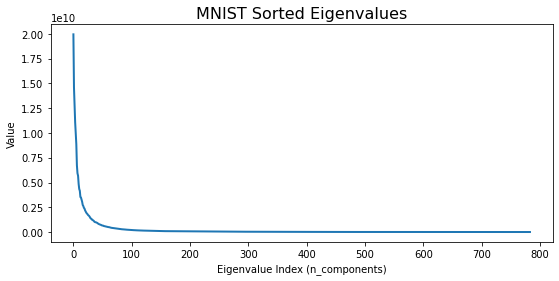

In [32]:
#References:
# (1) Inspired from Github Code
# (3) Plot Logic
# (4) Eigenvalues and covariance matrix

# Define a matrix
X = images
N = X.shape[0]
dims = images.shape[1:-1] # (28, 28)
X = X.reshape(N,-1)

# Calculate the mean of each column
mu = np.mean(X, axis=0)
X  = X - mu

# Calculate covariance matrix of centered matrix
C = X.T.dot(X) 

# Eigendecomposition of covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(C)
# The eigenvalues and vectors to be sorted by eigenvalue
a = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[a].real
eigenvectors = eigenvectors[:,a].real # Column i is ith eigenvalue.

plt.figure(figsize=(9, 4))
plt.plot(eigenvalues, lw=2)
plt.title(f'MNIST Sorted Eigenvalues', fontsize=16)
plt.xlabel('Eigenvalue Index (n_components)')
plt.ylabel('Value')

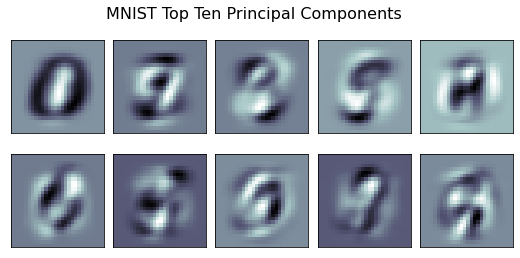

In [33]:
# Visualize principal components.
rows, cols = 2, 5
fig, axes = plt.subplots(rows, cols, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
  ax.imshow(eigenvectors[:,i].reshape(dims), cmap='bone')
plt.suptitle(f'MNIST Top Ten Principal Components', fontsize=16)
plt.show()

The principal components are blurred and pixelated images that still appear as numbers but it is difficult to know which is which. The simple answer is that there is not enough pixels ("a few") because the image is not clear enough to decide what the numbers are.   The main components seem to be pixel brightness. No two shapes are quite the same. 

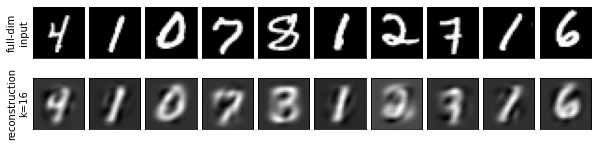

In [34]:
#References:
#(2) https://discord.com/channels/931331667040272444/931332869882806272/968804988992237588

# Plot reconstructions.
k = 16
projected = X.dot(eigenvectors[:,:k]).dot(eigenvectors[:,:k].T) + mu
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(images[i].reshape(dims), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(dims), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel(f'reconstruction\nk={k}')
plt.show()

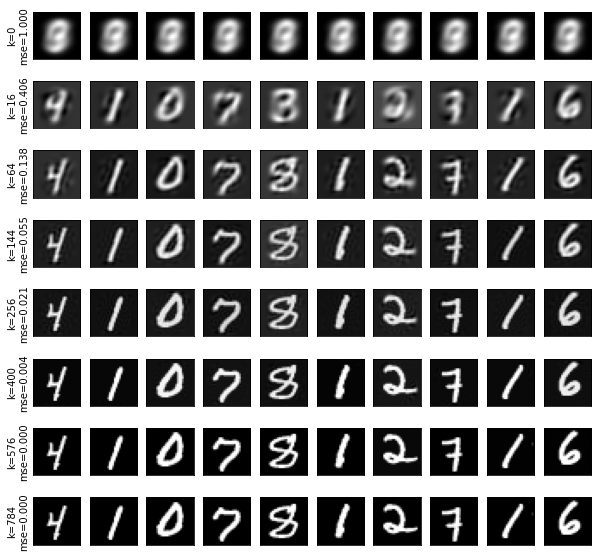

In [35]:
#References 
# (1) Inspried from Professors Github Code 

projections, losses_mnist = [], []
k_range = [x**2 for x in range(0,29,4)]
cols = 10
fig, ax = plt.subplots(len(k_range), cols, figsize=(10,10), 
                       subplot_kw={'xticks':[], 'yticks':[]}, 
                      )
for row, k in enumerate(k_range):
    projected = X.dot(eigenvectors[:,:k]).dot(eigenvectors[:,:k].T) + mu
    loss = ((X + mu - projected)**2).mean()
    projections.append(projected)
    losses_mnist.append(loss)
    for col in range(cols):
        ax[row, col].imshow(projected[col].reshape(dims), cmap='binary_r')
    ax[row,0].set_ylabel(f'k={k}\nmse={loss/losses_mnist[0]:.3f}')
plt.show()

In [36]:
# Download the Pokemon dataset
github = 'https://github.com/peterjsadowski/'
folder = 'pokemon_pca/raw/main/data/pokemon_mnist/'
csv_file = 'pokemon_mnist_images.csv'
url = f'{github}{folder}{csv_file}?dl=1'
images = np.array(pd.read_csv(url))

In [37]:
# Define a matrix
X = images
N = X.shape[0]
X = X.reshape(N,-1)

# Calculate the mean of each column
mu = np.mean(X, axis=0)
X  = X - mu

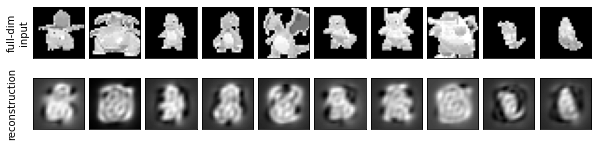

In [38]:
#References: 
#(1) Inspried from Professors Github Code 
#(3) Helped with reconstruction logic 

# Plot reconstructions.
k = 64
projected = X.dot(eigenvectors[:,:k]).dot(eigenvectors[:,:k].T) + mu
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(images[i].reshape(dims), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(dims), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('reconstruction\n')
plt.show()

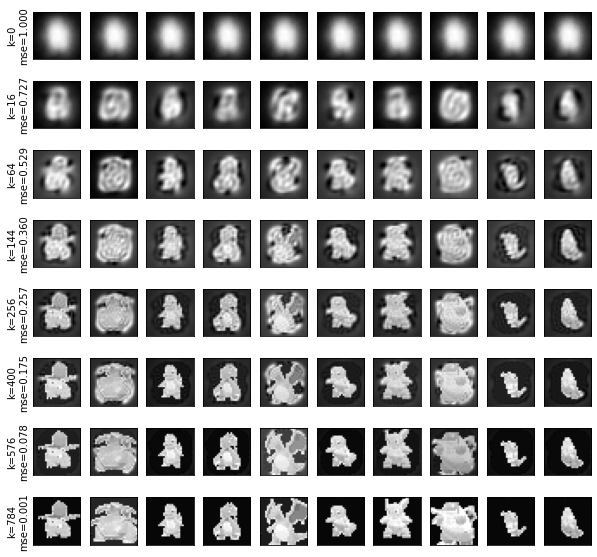

In [39]:
#References: 
#(1) Inspried from Professors Github Code

projections, losses_pokemon = [], []
k_range = [x**2 for x in range(0,29,4)]
cols = 10
fig, ax = plt.subplots(len(k_range), cols, figsize=(10,10), 
                       subplot_kw={'xticks':[], 'yticks':[]}, 
                        )
for row, k in enumerate(k_range):
    projected = X.dot(eigenvectors[:,:k]).dot(eigenvectors[:,:k].T) + mu
    loss = ((X + mu - projected)**2).mean()
    projections.append(projected)
    losses_pokemon.append(loss)
    for col in range(cols):
        ax[row, col].imshow(projected[col].reshape(dims), cmap='binary_r')
    ax[row,0].set_ylabel(f'k={k}\nmse={loss/losses_pokemon[0]:.3f}')
plt.show()

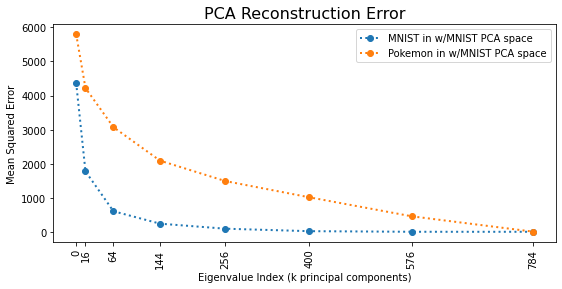

In [40]:
#References:
# (2) https://discord.com/channels/931331667040272444/931332869882806272/971103962965110784
# (3) Plot logic

plt.figure(figsize=(9,4))
plt.plot(k_range, losses_mnist, lw=2, 
         label='MNIST in w/MNIST PCA space',
         marker='o', ls='dotted')
plt.plot(k_range, losses_pokemon, lw=2, 
         label='Pokemon in w/MNIST PCA space', 
         marker='o', ls='dotted')
plt.title(f'PCA Reconstruction Error', fontsize=16)
plt.xlabel('Eigenvalue Index (k principal components)')
plt.ylabel('Mean Squared Error')
plt.xticks(k_range, rotation = 90)
plt.legend()
plt.show()  